In [1]:
from imdb import IMDb
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# plotting parameters
%matplotlib inline
plt.rcParams['figure.figsize'] = (5, 5)
plt.rcParams['figure.dpi'] = 150
plt.rcParams['figure.facecolor'] = 'w'

In [3]:
# create an instance of the IMDb class
ia = IMDb()

In [4]:
# read list of ratings
df_ratings = pd.read_csv('../data/IMDB_Top250_UID_title_rating.csv')
df_ratings.head()

,UID,Title,Rating
0,111161,The Shawshank Redemption,9.3
1,68646,The Godfather,9.2
2,71562,The Godfather: Part II,9.0
3,468569,The Dark Knight,9.0
4,50083,12 Angry Men,8.9


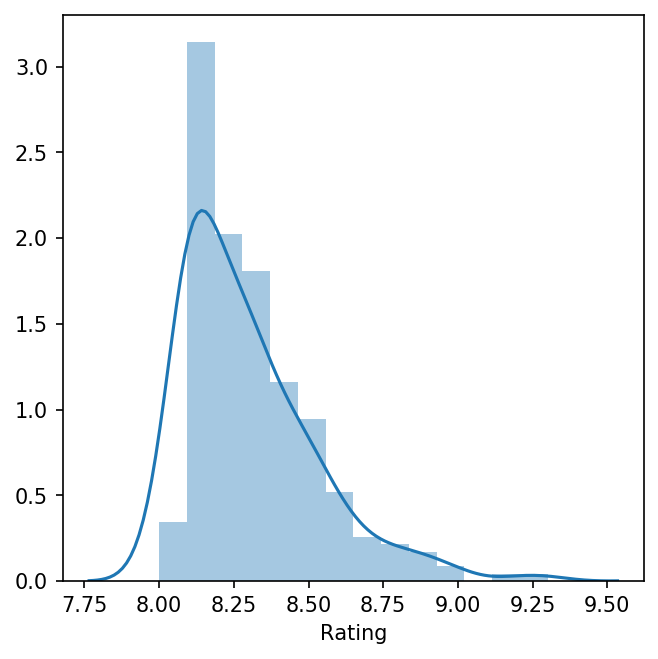

In [5]:
# histogram of ratings
sns.distplot(df_ratings.Rating)
plt.show()

In [6]:
# binarize the Ratings
df_ratings.Rating.describe()

count    250.000000
mean       8.298400
std        0.226545
min        8.000000
25%        8.100000
50%        8.200000
75%        8.400000
max        9.300000
Name: Rating, dtype: float64

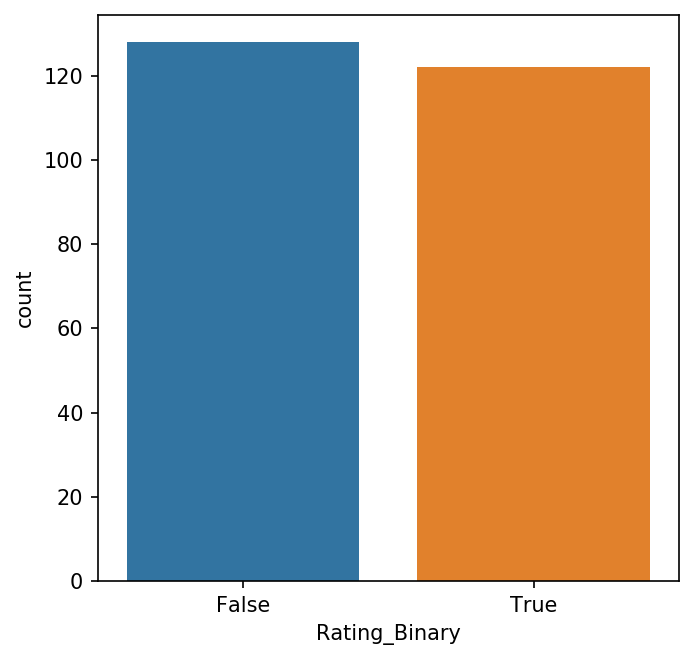

In [7]:
# create new column
df_ratings.loc[:, 'Rating_Binary'] = df_ratings.Rating > 8.2
sns.countplot(df_ratings.Rating_Binary)
plt.show()

# Acquire Features

In [8]:
# define function that searches for movie
def search_title_get_first_movie(title):
    """returns first movie in search results"""
    # create an instance of the IMDb class
    ia = IMDb()
    movies = ia.search_movie(title)
    first_id = movies[0].movieID
    movie = ia.get_movie(first_id)
    return(movie)

In [9]:
# test
test_movie = search_title_get_first_movie('Toy Story')
test_movie

<Movie id:0114709[http] title:_Toy Story (1995)_>

In [35]:
test_movie['box office']['Budget']

'$30,000,000 (estimated)'

In [37]:
test_movie['box office']['Opening Weekend United States']

'$12,491,789, 04 Oct 2009'

In [39]:
test_movie['box office']['Cumulative Worldwide Gross']

'$373,554,033'

In [17]:
# test_movie['cast'][:5]

[<Person id:0000158[http] name:_Tom Hanks_>,
 <Person id:0000741[http] name:_Tim Allen_>,
 <Person id:0725543[http] name:_Don Rickles_>,
 <Person id:0001815[http] name:_Jim Varney_>,
 <Person id:0001728[http] name:_Wallace Shawn_>]

In [18]:
test_movie['countries']

['United States']

In [22]:
test_movie['directors']

[<Person id:0005124[http] name:_John Lasseter_>]

In [23]:
test_movie['genres']

['Animation', 'Adventure', 'Comedy', 'Family', 'Fantasy']

In [25]:
test_movie['runtimes']

['81']

In [29]:
# test_movie['synopsis'][0][:100]

'A boy called Andy Davis (voice: John Morris) uses his toys to act out a bank robbery. The bank is a '

In [30]:
test_movie['title']

'Toy Story'

In [31]:
test_movie['votes']

839690

In [32]:
test_movie['writers']

[<Person id:0005124[http] name:_John Lasseter_>,
 <Person id:0230032[http] name:_Pete Docter_>,
 <Person id:0004056[http] name:_Andrew Stanton_>,
 <Person id:0710020[http] name:_Joe Ranft_>,
 <Person id:None[http] name:_None_>,
 <Person id:0923736[http] name:_Joss Whedon_>,
 <Person id:0004056[http] name:_Andrew Stanton_>,
 <Person id:0169505[http] name:_Joel Cohen_>,
 <Person id:0812513[http] name:_Alec Sokolow_>]

In [ ]:
test_movie['year']

In [34]:
test_movie['aspect ratio']

'1.78 : 1'

In [ ]:
# define list of high-level features
features_hl = ['box office', 'countries']

In [ ]:
# define function to acquire features
def acquire_features(movie):
    """acquire features and return dictionary"""

In [11]:
sorted(test_movie.keys())

['akas',
 'animation department',
 'art department',
 'art directors',
 'aspect ratio',
 'box office',
 'camera department',
 'canonical title',
 'cast',
 'casting department',
 'casting directors',
 'certificates',
 'color info',
 'composers',
 'countries',
 'country codes',
 'cover url',
 'director',
 'directors',
 'distributors',
 'editorial department',
 'editors',
 'full-size cover url',
 'genres',
 'kind',
 'language codes',
 'languages',
 'long imdb canonical title',
 'long imdb title',
 'miscellaneous',
 'music department',
 'original air date',
 'other companies',
 'plot',
 'plot outline',
 'producers',
 'production companies',
 'production managers',
 'rating',
 'runtimes',
 'smart canonical title',
 'smart long imdb canonical title',
 'sound department',
 'sound mix',
 'synopsis',
 'thanks',
 'title',
 'top 250 rank',
 'visual effects',
 'votes',
 'writer',
 'writers',
 'year']